# Guide 3: Public Cloud Computing with Microsoft Azure

You’re probably using cloud computing right now, even if you don’t realize it. Any time you use an online service to send email, edit documents, play games, or store pictures and other files, it’s likely that cloud computing is making it all possible under the hood. In the previous guide we covered storage service and in this one we are going to show you how to use cloud computing services such as Computer Vision, Speech Recognition, and Text Analytics that will respectively allow us to extract features and contents from images, to transcribe audio files to text, and to perform text analysis with Microsoft Azure.
Cloud computing services all work a little differently, depending on the provider. But many provide a friendly, browser-based dashboard that makes it easier for IT professionals and developers to order resources and manage their accounts. In the previous guides you familiarize with Azure Dashboard to create services and with Storage Explorer to manage your data. You also started  working with REST APIs and the SDK for Python that gave as more options for automating the processes. This guides is going to show you how to use the most interesting cloud computing services that we believe might be useful to social scientists for expanding the datasources to use for quantitative research.

We'll go over the basics of Microsoft Azure Storage, but we should point out that a *lot* of talented people have given tutorials, and we won't do any better than they have. *TODO Point out some resources and explain why they are good (add links).

# Table of Contents
* [Guide 3: Public Cloud Computing with Microsoft Azure](#Guide-2:-Public-Cloud-Computing-with-Microsoft-Azure)
* [Azure cloud computing basics](#Azure-Storage-Account-basics)
* [Common Tasks in using Azure cloud computing services](#Common-Tasks-in-using-Azure-Storage-Account)
    * [Use API and Request token](#Paragraph-3)
* [Set up containers and upload files](#Set-up-containers-and-upload-files)
* [Captions generation](#Captions-generation)
    * [Demo 1: Face API to detect facial characteristics and Emotion](#Paragraph-3)
    * [Demo 2: Computer Vision API to Analyze Image Contents](#Paragraph-3)
    * [Demo 3: Computer Vision API for Optical Character Recognition](#Paragraph-3)
* [Transcribe audio to text](#Transcribe-audio-to-text)
    * [Demo 4: Bing Speech Recognition API to convert audio files to text](#Paragraph-3)
* [Text Analysis](#Transcribe-audio-to-text)
    * [Demo 5: Key Phrases](#Paragraph-3)
    * [Demo 6: Sentiment Analysis](#Paragraph-3)

## Azure cloud computing basics
The first cloud computing services are barely a decade old, but already a variety of organizations—from tiny startups to global corporations, government agencies to non-profits—are embracing the technology for all sorts of reasons. Here are a few of the things you can do with the cloud:

- Create new apps and services
- Store, back up, and recover data
- Host websites and blogs
- Stream audio and video
- Deliver software on demand
- Analyze data for patterns and make predictions

Here are 6 common reasons organizations are turning to cloud computing services:

- **Cost**: eliminates/reduces a) the capital expense of buying hardware and software and setting up and running on-site datacenters, b) electricity for power and cooling, and c) the IT experts for managing the infrastructure.


- **Cost**:2. Speed
Most cloud computing services are provided self service and on demand, so even vast amounts of computing resources can be provisioned in minutes, typically with just a few mouse clicks, giving businesses a lot of flexibility and taking the pressure off capacity planning.


- **Cost**:3. Global scale
The benefits of cloud computing services include the ability to scale elastically. In cloud speak, that means delivering the right amount of IT resources—for example, more or less computing power, storage, bandwidth—right when its needed, and from the right geographic location.


- **Cost**:4. Productivity
On-site datacenters typically require a lot of “racking and stacking”—hardware set up, software patching, and other time-consuming IT management chores. Cloud computing removes the need for many of these tasks, so IT teams can spend time on achieving more important business goals.


- **Cost**:5. Performance
The biggest cloud computing services run on a worldwide network of secure datacenters, which are regularly upgraded to the latest generation of fast and efficient computing hardware. This offers several benefits over a single corporate datacenter, including reduced network latency for applications and greater economies of scale.


- **Reliability**: makes data backup, disaster recovery, and business continuity easier and less expensive, because data can be mirrored at multiple redundant sites on the cloud provider’s network.

## Common Tasks in using Azure Cloud Computing services
### Use API and Request token
https://www.soapui.org/learn/api/understanding-rest-headers-and-parameters.html

## Set up containers, upload files and retrieve BLOB URLs

- import functions from utilities.py 
- set directories to import images for demos (~\public_cloud_computing\data\G3_demo)
- retrieve storage account service credentials from your azure_keys (~\public_cloud_computing\guides\keys)
- create container, retrive files to download path and upload them. Use functions **`upload_files_to_container()`**
- retieve BLOB names and URLs using the function **`retrieve_blob_list `**

The function **`upload_files_to_container()`** call three functions at once for you: to retrieve files name, path and extensions uses **`get_files()`**, to create containers **`use make_public_container()`**, and to upload files to containers uses the function **`use upload_file()`**

In [1]:
#import library
import sys

#import functions from utilities
sys.path.insert(0, "../utilities/")
try:
    from utils import *
except ImportError:
    print('No Import')

In [2]:
#set local directory to upload files from, and directory to import azure keys from
cur_dir = os.getcwd()
os.chdir('../keys/')
dir_azure_keys = os.getcwd()
os.chdir('../../data/G3_demo/')
dir_files_demo = os.getcwd()

#print directories
print('---------------------------------------------------------')
print('Your documents directories are:')
print('- notebook:\t', cur_dir)
print('- azure keys:\t', dir_azure_keys)
print('- files:\t', dir_files_demo)
print('---------------------------------------------------------')

---------------------------------------------------------
Your documents directories are:
- notebook:	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\guides\G3
- azure keys:	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\guides\keys
- files:	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\data\G3_demo
---------------------------------------------------------


In [3]:
#retrive keys

#ERASE MY PATH BEFORE REALISING THE WORKSHOP MATERIALS
my_path_to_keys = 'C:/Users/popor/Desktop/'

#set service name, path to the keys and keys file name
SERVICE_NAME = 'STORAGE' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS
PATH_TO_KEYS = my_path_to_keys #add here (use dir_azure_keys)
KEYS_FILE_NAME = 'azure_services_keys_v1.1.json' #add file name (eg 'azure_services_keys.json')

#call function to retrieve
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set storage name and keys
STORAGE_NAME = storage_keys['NAME']
STORAGE_KEY = storage_keys['API_KEY']

In [5]:
#set a name for a new container
NEW_CONTAINER_NAME ='mycloudcomputingservices'

#set the audio file directory
DIR_FILES = dir_files_demo

#set content type of the file, in this case is a audio .wav
CONTENT_TYPE = 'image/'

upload_files_to_container(STORAGE_NAME, STORAGE_KEY, NEW_CONTAINER_NAME, DIR_FILES, CONTENT_TYPE)

mycloudcomputingservices BLOB container has been successfully created: True
------------------------------------------------------------------------------------------------------------------
Data stored from directory):	 C:\Users\popor\iqss_workshop\workshops\public_cloud_computing\data\G3_demo
------------------------------------------------------------------------------------------------------------------
Start uploading files
------------------------------------------------------------------------------------------------------------------
eisenhower_for_president_1952_frame100.jpg // BLOB upload status: successful
high_quality_famous_daisy_attack_ad_from_1964_presidential_election_frame900.jpg // BLOB upload status: successful
humphrey_laughing_at_spiro_agnew_1968_political_ad_frame500.jpg // BLOB upload status: successful
kennedy_for_me_campaign_jingle_jfk_1960_frame200.jpg // BLOB upload status: successful
ronald_reagan_tv_ad_its_morning_in_america_again_frame1200.jpg // BLOB uplo

In [6]:
#retrieve BLOB names and URLs
blob_name, blob_url = retrieve_blob_list(STORAGE_NAME, STORAGE_KEY, NEW_CONTAINER_NAME)

In [7]:
#import library to display image
from IPython.display import Image as ipImage, display

#display images 
for url, name in zip(blob_url, blob_name):
    img = ipImage(url=url, width=200, height=200)
    print(url)
    display(img)

https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/eisenhower_for_president_1952_frame100.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/high_quality_famous_daisy_attack_ad_from_1964_presidential_election_frame900.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/humphrey_laughing_at_spiro_agnew_1968_political_ad_frame500.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/kennedy_for_me_campaign_jingle_jfk_1960_frame200.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/ronald_reagan_tv_ad_its_morning_in_america_again_frame1200.jpg


https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/yes_we_can__barack_obama_music_video_frame1100.jpg


## Captions generation
### Demo 1: Detect Face Features and Emotion 

_**Description:**_
Detect human faces in an image, return face rectangles, and optionally with faceIds, landmarks, and attributes. Attributes include age, gender, headPose, smile, facialHair, glasses, emotion, hair, makeup, occlusion, accessories, blur, exposure and noise. It can detects up to 64 faces for an image. Faces are ranked by face rectangle size from large to small. Face detector prefer frontal and near-frontal faces. There are cases that faces may not be detected, e.g. exceptionally large face angles (head-pose) or being occluded, or wrong image orientation.

_**Input/Output:**_
JPEG, PNG, GIF (the first frame), and BMP format are supported. The allowed image file size is from 1KB to 6MB.
Faces are detectable when its size is 36x36 to 4096x4096 pixels. If need to detect very small but clear faces, please try to enlarge the input image. Higher face image quality means better detection and recognition precision. Please consider high-quality faces: frontal, clear, and face size is 200x200 pixels (100 pixels between eyes) or bigger.

A succesfull response returns:
![face_detect_output](img/face_detect_output.PNG)

_**URI:**_ https://[cloud_service_location].api.cognitive.microsoft.com/face/v1.0/detect

_**Documentation:**_
- Link to documentation ([FACE doc](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236))

_**How to use the service using REST API:**_
- import libraries
- retrieve service key
- configure API access to request face service
- set request headers
- set request parameters
- sent request
- extract response

In [8]:
#import library
import requests
import urllib
import json

In [41]:
#set service name
SERVICE_NAME = 'FACE'

#call function to retrive keys
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set text analytics keys
FACE_KEY = storage_keys['API_KEY']

In [42]:
#configure API access to request face service
URI_FACE = 'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect'

#set REST headers
headers = {}
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'
headers['Ocp-Apim-Subscription-Key'] = FACE_KEY

#set REST api request parameters
params_set = {}
params_set['returnFaceId'] = 'true'
params_set['returnFaceLandmarks'] = 'true'
params_set['returnFaceAttributes'] = 'gender,smile,age,emotion'

In [43]:
#set blob to use with FACE service
BLOB_URL = 'https://cloudcomputingplayground.blob.core.windows.net/mycloudservices/yes_we_can__barack_obama_music_video_frame1100.jpg' #add here BLOB url

#set a FACE request 
params = urllib.parse.urlencode(params_set)
query_string = '?{0}'.format(params) 
url = URI_FACE + query_string
body = '{\'url\':\'' + BLOB_URL + '\'}'

#request for FACE service   
api_response = requests.post(url, headers=headers, data=body)
print('{} had a {} response'.format(BLOB_URL.split('/')[-1], api_response))

#extract data from response in json format
response = json.loads(api_response.content.decode('utf-8'))

yes_we_can__barack_obama_music_video_frame1100.jpg had a <Response [200]> response


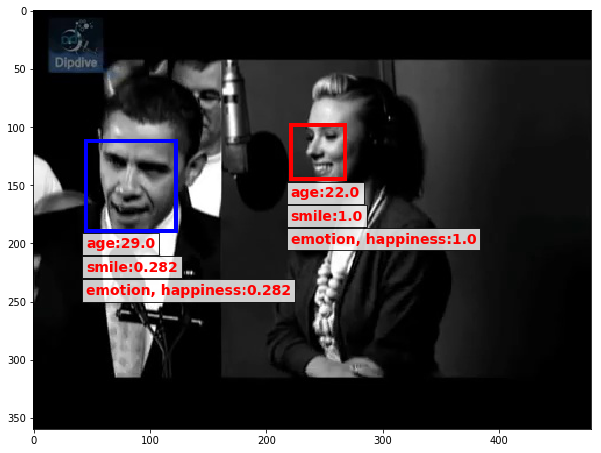

In [44]:
#extract age, gender, smile and emotions (i.e. happiness) from FACE response

# import libraries to display image
import io
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

# set image's name to read
blob_name = 'yes_we_can__barack_obama_music_video_frame1100.jpg'

#create blob service
blob_service = BlockBlobService(account_name= STORAGE_NAME, account_key=STORAGE_KEY)

#call method (i.e. get_blob_to_bytes to) read the images as byte array
blob = blob_service.get_blob_to_bytes(NEW_CONTAINER_NAME, blob_name)

#set variable that store in memory image's bytes 
blob_bytes_in_memory = io.BytesIO(blob.content)

#read bytes and display image in the notebook
img_bytes = Image.open(blob_bytes_in_memory)

#define figure size
plt.figure(figsize=(10, 10))
ax = plt.gca()

#draw face rectangles
for i in response:
    #extract face rectangle dimensions
    face_rectangle = i['faceRectangle']
    
    #set red frame for female and blu for male
    frame_color = 'red'
    if i['faceAttributes']['gender'] == 'male':
        frame_color = 'blue'

    #draw rectangle
    ax.add_patch(patches.Rectangle((face_rectangle['left'], face_rectangle['top']), face_rectangle['width'],face_rectangle['height'],
            fill=False, linewidth=4, color=frame_color))
    
    #add text 
    ax.text(face_rectangle['left'], face_rectangle['top']+face_rectangle['height']+15, 'age:'+str(i['faceAttributes']['age']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
    ax.text(face_rectangle['left'], face_rectangle['top']+face_rectangle['height']+35, 'smile:'+str(i['faceAttributes']['smile']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
    ax.text(face_rectangle['left'], face_rectangle['top']+face_rectangle['height']+55, 'emotion, happiness:'+str(i['faceAttributes']['emotion']['happiness']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))

plt.imshow(img_bytes);

In [14]:
#extract emotions from FACE response
print('The first face has the following emotions confidences:\n', json.dumps(response[0]['faceAttributes']['emotion'],indent=1, sort_keys=True))
print('----------------------------------')
print('The second face following emotions confidences:\n', json.dumps(response[1]['faceAttributes']['emotion'],indent=1, sort_keys=True))

The first face has the following emotions confidences:
 {
 "anger": 0.017,
 "contempt": 0.006,
 "disgust": 0.005,
 "fear": 0.0,
 "happiness": 0.282,
 "neutral": 0.684,
 "sadness": 0.005,
 "surprise": 0.001
}
----------------------------------
The second face following emotions confidences:
 {
 "anger": 0.0,
 "contempt": 0.0,
 "disgust": 0.0,
 "fear": 0.0,
 "happiness": 1.0,
 "neutral": 0.0,
 "sadness": 0.0,
 "surprise": 0.0
}


In [15]:
#################################################
#What could we use the output from FACE API for?#
#Can you think to any research example?         #
#################################################

### Demo 2: Analyze Image

_**Description:**_


_**Input/Output:**_


A succesfull response returns:
![face_detect_output](img/face_detect_output.PNG)

_**URI:**_ https://[cloud_service_location].api.cognitive.microsoft.com/face/v1.0/detect

_**Documentation:**_
- Link to documentation ([FACE doc](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236))

_**How to use the service using REST API:**_
- import libraries
- retrieve service key
- configure API access to request face service
- set request headers
- set request parameters
- sent request
- extract response

In [74]:
#set service name
SERVICE_NAME = 'COMPUTER_VISION' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS, ML_STUDIO

#call function to retrive keys
storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

#set text analytics keys
COMPUTER_VISION_KEY = storage_keys['API_KEY']

#configure API access to request text analytics service
URI_ANALYZE = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/analyze'

#set REST headers
headers = {}
headers['Ocp-Apim-Subscription-Key'] = COMPUTER_VISION_KEY
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'

#set api request parameters
params_set = {}
params_set['visualFeatures'] = 'Categories,Tags,Description,Faces,ImageType,Color,Adult'

In [75]:
#set blob to use with FACE service
BLOB_URL = 'https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/ronald_reagan_tv_ad_its_morning_in_america_again_frame1200.jpg' #add here BLOB url

#set a FACE request 
params = urllib.parse.urlencode(params_set)
query_string = '?{0}'.format(params) 
url = URI_ANALYZE + query_string
body = '{\'url\':\'' + BLOB_URL + '\'}'

#request for FACE service   
api_response = requests.post(url, headers=headers, data=body)
print('{} had a {} response'.format(BLOB_URL.split('/')[-1], api_response))

#extract data from response in json format
response = json.loads(api_response.content.decode('utf-8'))

ronald_reagan_tv_ad_its_morning_in_america_again_frame1200.jpg had a <Response [200]> response


In [77]:
#display the image and the text as the service interpreted it
print('----------------------------------')
print('Analyze Image Summary Results:')
print('----------------------------------')
print('The image is within the {} category with confidence {}'.format(response['categories'][0]['name'].strip('_'), response['categories'][0]['score']))
print('The image is within the {} category with confidence {}'.format(response['description']['captions'][0]['text'],response['description']['captions'][0]['confidence']))
print('The tags best describing the image are: {}'.format(response['description']['tags'][0:9]))
print('The image is black and white: {}'.format(response['color']['isBwImg']))
print('The image has adult content: {}'.format(response['adult']['isAdultContent']))
print('----------------------------------')

#display the image
img = ipImage(url=BLOB_URL, width=550, height=550)
display(img)

----------------------------------
Analyze Image Summary Results:
----------------------------------
The image is within the building category with confidence 0.78125
The image is within the a large white building category with confidence 0.8224850958751824
The tags best describing the image are: ['building', 'outdoor', 'dark', 'street', 'church', 'photo', 'old', 'large', 'white']
The image is black and white: False
The image has adult content: False
----------------------------------


In [45]:
######################################################
#What could we use the output from ANALYZE IMAGE for?#
#Can you think to any research example?              #
######################################################

### Demo 3: Optical Character Recognition

_**Description:**_


_**Input/Output:**_


A succesfull response returns:
![face_detect_output](img/face_detect_output.PNG)

_**URI:**_ https://[cloud_service_location].api.cognitive.microsoft.com/face/v1.0/detect

_**Documentation:**_
- Link to documentation ([FACE doc](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236))

_**How to use the service using REST API:**_
- import libraries
- retrieve service key
- configure API access to request face service
- set request headers
- set request parameters
- sent request
- extract response

In [50]:
#ALREADY STORED IN LOCAL MEMORY

#set service name
# SERVICE_NAME = 'COMPUTER_VISION' #add here: STORAGE, FACE, COMPUTER_VISION, SPEECH_RECOGNITION, TEXT_ANALYTICS, ML_STUDIO

# #call function to retrive keys
# storage_keys = retrieve_keys(SERVICE_NAME, PATH_TO_KEYS, KEYS_FILE_NAME)

# #set text analytics keys
# COMPUTER_VISION_KEY = storage_keys['API_KEY']

#configure API access to request text analytics service
URI_OCR = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr'

#set REST headers
headers = {}
headers['Ocp-Apim-Subscription-Key'] = COMPUTER_VISION_KEY
headers['Content-Type'] = 'application/json'
headers['Accept'] = 'application/json'

#set api request parameters
params_set = {}
params_set['language'] =  'unk'
params_set['detectOrientation'] = 'true'

In [64]:
#set blob to use with FACE service
BLOB_URL = 'https://cloudcomputingplayground.blob.core.windows.net/mycloudcomputingservices/eisenhower_for_president_1952_frame100.jpg' #add here BLOB url

#set a FACE request 
params = urllib.parse.urlencode(params_set)
query_string = '?{0}'.format(params) 
url = URI_OCR + query_string
body = '{\'url\':\'' + BLOB_URL + '\'}'

#request for FACE service   
api_response = requests.post(url, headers=headers, data=body)
print('{} had a {} response'.format(BLOB_URL.split('/')[-1], api_response))

#extract data from response in json format
response = json.loads(api_response.content.decode('utf-8'))

eisenhower_for_president_1952_frame100.jpg had a <Response [200]> response


In [65]:
#parse response and extract words
ocr_words = []

for i in response['regions']:
    for k, box in enumerate(i['lines']):
        for l, word in enumerate(box['words']):
            ocr_words.append(word['text'])

In [80]:
#display the image and the text as the OCR service interpreted it
print('--------------------------------------------------------------------')
print('Optical Character Recognition Summary Results:')
print('--------------------------------------------------------------------')
print('The words that appear in the image are:\n', ocr_words)
print('--------------------------------------------------------------------')
img = ipImage(url=BLOB_URL, width=550, height=550)
display(img)

--------------------------------------------------------------------
Optical Character Recognition Summary Results:
--------------------------------------------------------------------
The words that appear in the image are:
 ['PAID', 'POLITICALANNOUNCEMENT', 'PAID', 'FOR', 'BY', 'Citizens', 'for', 'Eisenhower']
--------------------------------------------------------------------


## Transcribe audio to text
### Demo 4: Speech Recognition

_**Description:**_


_**Input/Output:**_


A succesfull response returns:
![face_detect_output](img/face_detect_output.PNG)

_**URI:**_ https://[cloud_service_location].api.cognitive.microsoft.com/face/v1.0/detect

_**Documentation:**_
- Link to documentation ([FACE doc](https://westus.dev.cognitive.microsoft.com/docs/services/563879b61984550e40cbbe8d/operations/563879b61984550f30395236))

_**How to use the service using REST API:**_
- import libraries
- retrieve service key
- configure API access to request face service
- set request headers
- set request parameters
- sent request
- extract response

## Text Analysis
### Demo 5: Key Phrases
### Demo 6: Sentiment Analysis

In [ ]:
# import libraries to display image
import io
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# FACE API service Url (change based on the region*)
face_api = 'https://eastus.api.cognitive.microsoft.com/face/v1.0/detect'
# Azure Cognitive Services Key for FACE API
key_1 = '620facc4717d4136b665e43a618c2911'

In [ ]:
img_url = 'https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/leonid_andreev.png'    
img = Image(url=img_url, width=300, height=350)
display(img)

In [ ]:
headers = {'Content-Type': 'application/json', 
           'Ocp-Apim-Subscription-Key':key_1}

params = urllib.parse.urlencode({'returnFaceId' : 'true',
                                 'returnFaceLandmarks' : 'true',
                                 'returnFaceAttributes' : 'age,gender,emotion,smile,hair,exposure'})

query_string = '?{0}'.format(params)

url = face_api + query_string

body = '{\'url\':\'' + img_url + '\'}'

api_response = requests.post(url, headers=headers, data=body)

In [ ]:
api_response

In [ ]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

In [ ]:
# set image's name to read
blob_name = 'steven_worthington.png'

# call method (i.e. get_blob_to_bytes to) read the images as byte array
blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

# set variable that store in memory image's bytes 
blob_bytes_in_memory = io.BytesIO(blob.content)

# read bytes and display image in the notebook
img_bytes = Image.open(blob_bytes_in_memory)
plt.figure(figsize=(7,7))
plt.imshow(img_bytes);

In [ ]:
# import libraries to send HTTP requests and to craft URL
import requests
import urllib

In [ ]:
headers = {'Content-Type': 'application/json', 
           'Ocp-Apim-Subscription-Key':key_1}

params = urllib.parse.urlencode({'returnFaceId' : 'true',
                                 'returnFaceLandmarks' : 'true',
                                 'returnFaceAttributes' : 'age,gender,emotion,smile,hair,exposure'})

query_string = '?{0}'.format(params)

url = face_api + query_string

body = '{\'url\':\'' + img_url + '\'}'

api_response = requests.post(url, headers=headers, data=blob.content)

In [ ]:
# Set the request headers
headers = {'Content-Type': 'application/octer-stream', # or 'application/json' for remote stored image files
           'Ocp-Apim-Subscription-Key': key_1} # for locally stored

# Set request parameters converted to HTTP protocol
# these parameters tell the api I want to detect a face and a smile
params = urllib.parse.urlencode({'returnFaceId' : 'true',
                                 'returnFaceLandmarks' : 'true',
                                 'returnFaceAttributes' : 'age,gender,emotion,smile,hair,exposure'})


In [ ]:
# compone query with chosen parameters and associaed URL
query = '?{0}'.format(params)
url = face_api + query

In [ ]:
url

In [ ]:
# FACE api only returns 1 analysis at time
api_response = requests.post(url, 
                             headers=headers, 
                             data=blob.content) # use local memory (use content of blob converted to array)

In [ ]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

In [ ]:
# How ML helps finding faces?

##################################################################
#                                                                #
#                                                                #
#                                                                #
##################################################################

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

plt.figure(figsize=(7, 7))
ax = plt.gca()

# Draw face rectangles
for i in res_json:
    fr = i['faceRectangle'] # get faceRectangle node per detected face in the image

    pc = 'red' # patch color
    if i['faceAttributes']['gender'] == 'male':
        pc = 'blue'

    ax.add_patch(
        patches.Rectangle(
            (fr['left'], fr['top']), fr['width'], fr['height'],
            fill=False, linewidth=4, color=pc)
    )
    
    ax.text(fr['left'], fr['top']+fr['height'], 
            'age:'+str(i['faceAttributes']['age']), 
            fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
    

# ps = 5       # patch size
# pc = '#00FF00'   # patch color

# #Draw eye, nose, mouth
# for i in res_json:
#     fl = i['faceLandmarks']

#     # left eye
#     ax.add_patch(patches.Circle((fl['pupilLeft']['x'], fl['pupilLeft']['y']), ps, color=pc))

#     # right eye
#     ax.add_patch(patches.Circle((fl['pupilRight']['x'], fl['pupilRight']['y']), ps, color=pc))

#     # mouth
#     ax.add_patch(patches.Circle((fl['mouthLeft']['x'], fl['mouthLeft']['y']), ps, color=pc))
#     ax.add_patch(patches.Circle((fl['mouthRight']['x'], fl['mouthRight']['y']), ps, color=pc))

#     # nose
#     ax.add_patch(patches.Circle((fl['noseTip']['x'], fl['noseTip']['y']), ps, color=pc))

plt.imshow(img_bytes);

### Demo 2) Analyze Image (vision/v1.0/analyze)


_**Description:**_
- Blah,blah

_**Input/Output:**_
- This, and that

_**Documentation:**_
- Link to documentation (show the example on the user, then on the tutorial): https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fa

**##TODO** add link in pythonic, format (code style)

In [ ]:
# import library to display images
from IPython.display import Image as ipImage, display

In [ ]:
#Process:
#1_Set_Cognitive_Service_Key(e.g. Face, Computer Vision, etc)
#2_Set_Service_API(eg. from FACE choose DETECT, from COMPUTER VISION choose ANALYZE)
#3_BlOB
#4_Display_Image

In [ ]:
# Azure Cognitive Services Key for COMPUTER VISION API
azure_key_computer_vision = 'b9fb47b349694da0bb42ffb5d687c7c0'

# Set API for Analyze service
analyze_api = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/analyze'

In [ ]:
# 
img_url = 'https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/vision1.jpeg'    
img = ipImage(url=img_url, width=450, height=450)
display(img)

In [ ]:
headers = {'Content-Type': 'application/json', 
           'Ocp-Apim-Subscription-Key':azure_key_computer_vision}

params = urllib.parse.urlencode({
    'visualFeatures': 'Categories,Tags,Description,Faces,ImageType,Color,Adult',
})

query_string = '?{0}'.format(params)

url = analyze_api + query_string

body = '{\'url\':\'' + img_url + '\'}'

api_response = requests.post(url, headers=headers, data=body)

In [ ]:
api_response

In [ ]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

**##TODO** 
 - find more interesting pictures
 - display nice output

### **_Demo 3) Optical Character Recognition (vision/v1.0/ocr)_**


_**Description:**_
- Blah,blah

_**Input/Output:**_
- This, and that

_**Documentation:**_
- Link to documentation (show the example on the user, then on the tutorial): 
https://westus.dev.cognitive.microsoft.com/docs/services/56f91f2d778daf23d8ec6739/operations/56f91f2e778daf14a499e1fc

**##TODO** add link in pythonic, format (code style)

In [ ]:
# Azure Cognitive Services Key for COMPUTER VISION API
# azure_key_computer_vision = 'b9fb47b349694da0bb42ffb5d687c7c0' (do not need this again)

# Set API for OCR service
ocr_api = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr'

In [ ]:
# load image file to process
# blob_name = 'ocr_iqss_1.png'
# blob = blob_service.get_blob_to_bytes(container_name, blob_name)
# image_file_in_mem = io.BytesIO(blob)
# img_bytes = Image.open(image_file_in_mem)

# set image's name to read
blob_name = 'ocr_iqss_1.png'

# call method (i.e. get_blob_to_bytes to) read the images as byte array
blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

# set variable that store in memory image's bytes 
blob_bytes_in_memory = io.BytesIO(blob.content)

# read bytes and display image in the notebook
img_bytes = Image.open(blob_bytes_in_memory)

In [ ]:
plt.figure(figsize=(12, 12))
ax = plt.gca()
# img_url = 'https://cloudcomputingplayground.blob.core.windows.net/cloudcomputingcontainer/ocr_iqss_1.png'
# img = ipImage(url=img_url, width=500, height=500)
# display(img)

plt.imshow(img_bytes)

In [ ]:
analyse_api = 'https://eastus.api.cognitive.microsoft.com/vision/v1.0/ocr'

headers = {'Content-Type': 'application/octet-stream', 
           'Ocp-Apim-Subscription-Key':azure_key_computer_vision}

params = urllib.parse.urlencode({
    'language': 'unk',
    'detectOrientation': 'true',
})

query_string = '?{0}'.format(params)

url = ocr_api + query_string

api_response = requests.post(url, headers=headers, data=blob.content)

In [ ]:
url

In [ ]:
import json
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [ ]:
plt.figure(figsize=(12, 12))
ax = plt.gca()

text_angle = 0
try:
    text_angle = res_json['textAngle']
except:
    pass

# Draw OCR rectangles
for i in res_json['regions']:
    pl = i['lines']
    for k in pl:
        words = k['words']
        for l in words:
            bb = l['boundingBox']
            txt = l['text']
            
            bb = list(map(int, bb.split(',')))
            
            ax.add_patch(
                patches.Rectangle(
                    (bb[0], bb[1]), bb[2], bb[3], angle=text_angle,
                    fill=False, linewidth=4, color='#00FF00')
            )
            
            ax.text(bb[0], bb[1], txt, 
                    fontsize=14, weight='bold', color='red', bbox=dict(facecolor='white', alpha=0.8))
            
plt.imshow(img_bytes)

### **_Demo 4) Speech Recognition (sts/v1.0/issueToken)_**


_**Description:**_
- Blah,blah

_**Input/Output:**_
- This, and that

_**Documentation:**_
- Link to documentation (show the example on the user, then on the tutorial): 
https://docs.microsoft.com/en-us/azure/cognitive-services/speech/getstarted/getstartedrest?tabs=Powershell

**##TODO** 
add link in pythonic, 
format (code style), 
add picture to explain how it works(if needed)

In [ ]:
#make an example simple and build the more complex

azure_key_bing_speech = '5d14da803af54010ba390d560b203354'

In [ ]:
from IPython.display import Audio, display
import requests
import urllib
import uuid
import json

In [ ]:
video_list = ['Eisenhower_1952.chunk0.wav','Eisenhower_1952.chunk1.wav'
             'Eisenhower_1952.chunk2.wav','Eisenhower_1952.chunk3.wav']

In [ ]:
# load speech file to process
blob_name = 'Eisenhower_1952.chunk0.wav'
blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

wav_bytes = Audio(data=blob.content)
display(wav_bytes)

In [ ]:
uri_token = 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken'

headers = {'Content-Length': '0', 
           'Ocp-Apim-Subscription-Key': azure_key_bing_speech}

api_response = requests.post(uri_token, headers=headers)

access_token = str(api_response.content.decode('utf-8'))

In [ ]:
blob.content[0:20]

In [ ]:
# Service
# Call Speech to text service
url_stt_api = 'https://speech.platform.bing.com/recognize' # service address 

headers = {
           'Authorization': 'Bearer {0}'.format(access_token),
           'Content-type': 'audio/wav', 'codec': 'audio/pcm', 'samplerate': '16000'}

params = urllib.parse.urlencode({
    'scenarios': 'ulm',
    'appid': 'D4D52672-91D7-4C74-8AD8-42B1D98141A5', # dont change, it is fixed by design
    'locale': 'en-US', # speech in english
    'device.os': 'PC',
    'version': '3.0',
    'format': 'json', # return value in json
    'instanceid': str(uuid.uuid1()), # any guid
    'requestid': str(uuid.uuid1()),
})

api_response = requests.post(url_stt_api, headers=headers, params=params, data=blob.content)

In [ ]:
api_response

In [ ]:
res_json = json.loads(api_response.content.decode('utf-8'))
text = res_json['results'][0]['lexical']
res_json

In [ ]:
#build a speech recognition request

#try taking out token

#request a token
uri_api = 'https://api.cognitive.microsoft.com/sts/v1.0/issueToken'
headers = {'Content-Length': '0', 'Ocp-Apim-Subscription-Key': speech_recognition_key}
response_api = requests.post(uri_api, headers=headers)
token = str(response_api.content.decode('utf-8'))



def speech_recognition_request(blob_name, blob_container_name, speech_recognition_key):
    
    #load audio file to process
    blob = blob_service.get_blob_to_bytes(blob_container_name, blob_name)

    #send request to Speech Recognition service 
    url_api = 'https://speech.platform.bing.com/recognize'
    headers = {'Authorization': 'Bearer {0}'.format(token),
               'Content-type': 'audio/wav',
               'codec': 'audio/pcm',
               'samplerate': '16000'}
    params = urllib.parse.urlencode({
        'scenarios': 'ulm',
        'appid': 'D4D52672-91D7-4C74-8AD8-42B1D98141A5',
        'locale': 'en-US',
        'device.os': 'PC',
        'version': '3.0',
        'format': 'json',
        'instanceid': str(uuid.uuid1()),
        'requestid': str(uuid.uuid1())})
    response_api = requests.post(url_api, headers=headers, params=params, data=blob.content)

    #from response
    res_json = json.loads(response_api.content.decode('utf-8'))
    text = res_json['results'][0]['lexical']
    #confidence = res_json['results'][0]['confidence']
    
    return text #, confindence

In [ ]:
#retrive your keys
import pickle
with open('../keys/azure_services_keys.json', 'rb') as handle:
    azure_keys = pickle.load(handle)

In [ ]:
import time
start = time.time()
print("hello")

video_text = []
#text_confidence = []

for blob_name in video_list:
    text =speech_recognition_request(blob_name,'cloudcomputingcontainer',azure_keys['SPEECH_RECOGNITION']['API_KEY']) # confindence
    video_text.append(text)
    #text_confidence.append(confindence)

end = time.time()
print(end - start)

In [ ]:
azure_keys['SPEECH_RECOGNITION']['API_KEY'] == azure_key_bing_speech

In [ ]:
api_response 

In [ ]:
res_json = json.loads(api_response.content.decode('utf-8'))

print(json.dumps(res_json, indent=2, sort_keys=True))

In [ ]:
res_json.keys()

In [ ]:
res_json['results'][0]['confidence']

In [ ]:
#import library to display notebook as HTML
import os
from IPython.core.display import HTML

#path to .ccs style script
cur_path = os.path.dirname(os.path.abspath("__file__"))
new_path = os.path.relpath('..\\..\\styles\\custom_styles_public_cloud_computing.css', cur_path)

#function to display notebook
def css():
    style = open(new_path, "r").read()
    return HTML(style)

In [ ]:
#run this cell to apply HTML style
css()

# ---

## Microsoft Cognitive Services APIs with Python

#### List of services shown in this tutorial:
    
- Captions generation
    - Face API to detect facial characteristics
    - Computer Vision API to Analyze Image Contents
    - Computer Vision API for Optical Character Recognition

- Transcribe audio to text
    - Bing Speech Recognition API

- Text Analysis
    - Key Phrases 
    - Sentiment Analysis


- **what are some research applications?**
---

#### What are you going to learn

- use cloud computing services to extract data from images and audio document
- use microsoft azure cloud computing services
- text analysis: predict and topic detection

---

#### Requirements

**TODO**

- list necessary dependencies (pip install azure)
- script to install dependecies
---

In [ ]:
# add CSS file